Author: Nur Aliyah Misri<br>
Version: v2.0<br>
Changes: <br>
2.0 Updating from plotly express to matplot for bar charts<br>
Last Upadate: 28-May-23

# 1. Introduction

Bluetooth Low Energy (BLE) beacon is a small battery powered radio transmitter that send beacon signals which contain information such as signal strength, URL (Universal Resource Locator), UUID (Universal Unique Identifier), battery voltage, etc. 

BLE beacons are one-way communication devices which only send the information but are unable to receive or request information. The BLE receivers or gateway, which typically installed within the facility will receive the signal from beacon. A wireless fingerprint data is created which used to locate the BLE beacon.

Application of BLE in BLE beacons are commonly used in various industries such as healthcare, retail, travel, and manufacturing. Use cases include (but not limited to) tracking assets, tracking location of guests/employees/customers, advertising and promotions.

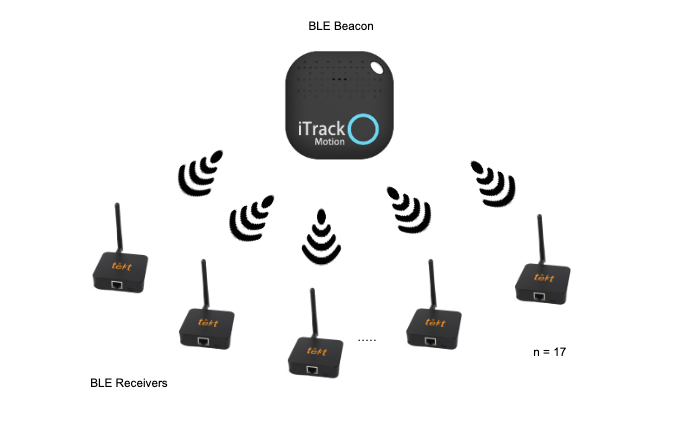

# 2. Scope of Project

The dataset provided is collected in an office environment where 17 BLE receivers are installed. 

For the purpose of this project, the use case simulated based on the dataset will be based on tracking the location of guests. Dataset comprises offline and online datasets with information such as MAC addressess of the BLE transmitters and the corresponding location.

# 3. Problem Statement of Project

Typically in office, staffs would receive external guests for meeting, maintainence, or inspection. However there are limit area or office facility where guests are not allowed to enter. By predicting the location, the security staff able to detect the guests' location hence able to pre-alert nearby staff to not allow guest entering the prohibited area.

Our objectives in this project are:
1. To identify trends and patterns of the BLE location
2. To experiment with several machine learning models in predicting location of BLE beacon (measured in (X,Y) coordinates).
3. To recommend machine learning model that provide minimum distance error compared to ground truth.

# 4. Methodology

This project is build based on methodlogy of CRoss Industry Standard Process for Data Mining (CRISP-DM). CRISP is a common approach used in data science projects which are very relevant to this project. CRISP-DM is also an iterative process.

It has six steps which steps as per below:
1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

# 3. Data Understanding 

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
import geopandas

## 3.1 Import Dataset

In [2]:
# Import training dataset

x_train = pd.read_csv('/X_train.csv')
y_train = pd.read_csv('/y_train.csv')
pin_info_train = pd.read_csv('/PinInfo.csv')


In [3]:
# Import test dataset

x_test = pd.read_csv('/X_test.csv')
y_test = pd.read_csv('/y_test.csv')
pin_info_test = pd.read_csv('/PinInfo.csv')


In [42]:
# Import submission dataset

x_test_sub = pd.read_csv('/X_test_submission.csv')


In [44]:
#Fill NaN value

x_test_sub = x_test_sub.fillna(0)
x_test_sub

,CD4533FFC0E1,D2B6503554D7,D7EE034361F8,DD697EA75B68,DF231643E227,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,F8EE8B0847A4,FDAE5980F28C,EC72840D9AD3,E96AF2C858BA,E13B805C6CB0,FB2EE01C18CE
0,0.0,0.000000,-88.500000,-88.000000,0.0,-76.400000,0.0,-80.600000,0.0,-76.285714,-82.000000,0.0,-78.000000,-96.0,0.0,0.0,0.0
1,0.0,0.000000,-88.333333,-90.666667,0.0,-76.800000,0.0,-82.200000,0.0,-77.166667,-82.333333,0.0,-84.000000,-93.0,0.0,0.0,0.0
2,-95.0,0.000000,-87.000000,-91.000000,0.0,-81.000000,0.0,-78.666667,0.0,-75.833333,-81.666667,0.0,-78.250000,0.0,0.0,0.0,0.0
3,-94.0,0.000000,-87.500000,0.000000,0.0,-76.500000,0.0,-79.000000,0.0,-77.000000,-80.666667,0.0,-80.500000,0.0,0.0,0.0,0.0
4,-94.5,0.000000,-87.428571,-90.250000,0.0,-78.250000,0.0,-76.333333,0.0,-76.900000,-83.500000,-94.0,-79.000000,-94.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-82.0,-94.000000,-82.000000,-88.500000,0.0,0.000000,0.0,-80.333333,0.0,-93.400000,-65.125000,0.0,-68.333333,-84.0,0.0,0.0,0.0
284,-91.0,-86.000000,-80.666667,-82.000000,0.0,-79.000000,0.0,-81.500000,-78.0,-95.000000,-65.333333,0.0,-69.000000,-89.0,0.0,0.0,0.0
285,-84.5,0.000000,-84.000000,0.000000,0.0,-78.800000,0.0,-81.750000,-89.5,-94.000000,-65.500000,-94.0,-65.000000,0.0,0.0,0.0,0.0
286,0.0,-88.333333,-82.428571,-86.333333,0.0,-85.000000,0.0,-82.000000,-79.0,-92.333333,-65.400000,-96.0,-67.000000,-85.0,0.0,0.0,0.0


## 3.2 Inspecting Dataset

In [5]:
# 2.21 Display sample dataset and info of x_train dataset

print(x_train.head(5))
print(x_train.info())

   CD4533FFC0E1  D2B6503554D7  D7EE034361F8  DD697EA75B68  DF231643E227  \
0    -83.852941    -87.000000    -66.034483    -86.791667    -89.041667   
1    -84.800000    -87.600000    -66.136364    -85.812500    -88.411765   
2    -84.000000    -87.454545    -66.531250    -86.142857    -90.000000   
3    -87.450000    -89.428571    -65.818182    -85.769231    -89.333333   
4    -84.757576    -88.333333    -65.636364    -86.214286    -89.444444   

   E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  F1307ECB3B90  F1EDAF28E08A  \
0    -76.217391    -96.333333    -85.909091    -69.342105    -84.575000   
1    -76.720930    -95.000000    -88.416667    -69.117647    -84.978261   
2    -76.766667    -95.000000    -86.333333    -69.291667    -85.081081   
3    -76.388889    -96.000000    -88.384615    -69.850000    -84.520000   
4    -76.818182           NaN    -87.666667    -68.551724    -86.306122   

   F69A86823B96  F8EE8B0847A4  FDAE5980F28C  EC72840D9AD3  E96AF2C858BA  \
0    -79.028571    -84.

In [6]:
#2.22 Check for any null values
print(x_train.isna().sum())
print(x_train.isnull().values.any())

#2.23 Summary statistics for dataset
print(x_train.describe())

CD4533FFC0E1     75
D2B6503554D7    246
D7EE034361F8     86
DD697EA75B68     95
DF231643E227    157
E43355CA8B96    521
E6D9D20DD197    739
E8FD0B453DC4    422
F1307ECB3B90    188
F1EDAF28E08A    757
F69A86823B96    162
F8EE8B0847A4    224
FDAE5980F28C    360
EC72840D9AD3    204
E96AF2C858BA    588
E13B805C6CB0    310
FB2EE01C18CE    942
dtype: int64
True
       CD4533FFC0E1  D2B6503554D7  D7EE034361F8  DD697EA75B68  DF231643E227  \
count   1500.000000   1329.000000   1489.000000   1480.000000   1418.000000   
mean     -85.307795    -85.906442    -86.432911    -86.708529    -86.057089   
std        7.447779      5.079135      7.624345      6.356746      7.100093   
min      -98.000000    -97.000000    -98.000000    -96.800000    -98.000000   
25%      -90.333333    -89.294118    -92.350000    -91.648810    -92.534091   
50%      -86.635255    -86.833333    -87.384615    -88.045455    -86.414216   
75%      -81.480249    -83.653846    -81.526316    -83.747984    -81.166493   
max      -

In [7]:
#2.34 Understand distribution of data


pin_info_train['PinId'] = pin_info_train['pinId'] 
df_train = pd.concat([x_train, y_train], axis = 1)
df_train = pd.merge(df_train, pin_info_train, on ='PinId', how ='left')
print(df_train.head(5))


   CD4533FFC0E1  D2B6503554D7  D7EE034361F8  DD697EA75B68  DF231643E227  \
0    -83.852941    -87.000000    -66.034483    -86.791667    -89.041667   
1    -84.800000    -87.600000    -66.136364    -85.812500    -88.411765   
2    -84.000000    -87.454545    -66.531250    -86.142857    -90.000000   
3    -87.450000    -89.428571    -65.818182    -85.769231    -89.333333   
4    -84.757576    -88.333333    -65.636364    -86.214286    -89.444444   

   E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  F1307ECB3B90  F1EDAF28E08A  ...  \
0    -76.217391    -96.333333    -85.909091    -69.342105    -84.575000  ...   
1    -76.720930    -95.000000    -88.416667    -69.117647    -84.978261  ...   
2    -76.766667    -95.000000    -86.333333    -69.291667    -85.081081  ...   
3    -76.388889    -96.000000    -88.384615    -69.850000    -84.520000  ...   
4    -76.818182           NaN    -87.666667    -68.551724    -86.306122  ...   

   F8EE8B0847A4  FDAE5980F28C  EC72840D9AD3  E96AF2C858BA  E13B805C6

In [8]:
# Create index("unique id") for each record

df_train['index_column'] = df_train.index
df_train.reset_index(inplace=True)
df_train['fingerprint_id'] = df_train['index']

del df_train['index_column']
del df_train['pinId']
del df_train['index']

print(df_train)

      CD4533FFC0E1  D2B6503554D7  D7EE034361F8  DD697EA75B68  DF231643E227  \
0       -83.852941    -87.000000    -66.034483    -86.791667    -89.041667   
1       -84.800000    -87.600000    -66.136364    -85.812500    -88.411765   
2       -84.000000    -87.454545    -66.531250    -86.142857    -90.000000   
3       -87.450000    -89.428571    -65.818182    -85.769231    -89.333333   
4       -84.757576    -88.333333    -65.636364    -86.214286    -89.444444   
...            ...           ...           ...           ...           ...   
1570    -91.111111    -86.000000    -80.222222    -83.777778    -93.250000   
1571    -90.000000    -85.555556    -80.666667    -83.631579    -93.500000   
1572    -89.300000    -87.076923    -78.781250    -85.727273    -92.800000   
1573    -90.100000    -86.750000    -82.333333    -83.850000    -93.166667   
1574    -90.555556    -86.272727    -79.500000    -86.222222    -93.666667   

      E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  F1307ECB3B90  F

## 3.3 Exploratory Data Analysis

In [9]:
df_train

,CD4533FFC0E1,D2B6503554D7,D7EE034361F8,DD697EA75B68,DF231643E227,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,F1307ECB3B90,F1EDAF28E08A,...,F8EE8B0847A4,FDAE5980F28C,EC72840D9AD3,E96AF2C858BA,E13B805C6CB0,FB2EE01C18CE,PinId,x,y,fingerprint_id
0,-83.852941,-87.000000,-66.034483,-86.791667,-89.041667,-76.217391,-96.333333,-85.909091,-69.342105,-84.575000,...,-84.735294,-83.666667,NaN,NaN,NaN,NaN,V1_10,11.17660,5.29753,0
1,-84.800000,-87.600000,-66.136364,-85.812500,-88.411765,-76.720930,-95.000000,-88.416667,-69.117647,-84.978261,...,-81.407407,-82.714286,-77.590909,NaN,NaN,NaN,V1_10,11.17660,5.29753,1
2,-84.000000,-87.454545,-66.531250,-86.142857,-90.000000,-76.766667,-95.000000,-86.333333,-69.291667,-85.081081,...,-83.033333,-84.388889,-80.920000,NaN,NaN,NaN,V1_10,11.17660,5.29753,2
3,-87.450000,-89.428571,-65.818182,-85.769231,-89.333333,-76.388889,-96.000000,-88.384615,-69.850000,-84.520000,...,-82.312500,-82.421053,-76.090909,NaN,NaN,NaN,V1_10,11.17660,5.29753,3
4,-84.757576,-88.333333,-65.636364,-86.214286,-89.444444,-76.818182,NaN,-87.666667,-68.551724,-86.306122,...,-85.764706,-82.619048,-79.866667,-98.0,NaN,NaN,V1_10,11.17660,5.29753,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,-91.111111,-86.000000,-80.222222,-83.777778,-93.250000,-72.000000,NaN,-93.071429,-81.423077,-70.017544,...,-87.409091,-83.000000,NaN,NaN,-89.545455,NaN,V1_9,8.17867,5.28213,1570
1571,-90.000000,-85.555556,-80.666667,-83.631579,-93.500000,-72.461538,NaN,-92.222222,-78.714286,-70.895833,...,-83.000000,-89.000000,NaN,NaN,-91.000000,NaN,V1_9,8.17867,5.28213,1571
1572,-89.300000,-87.076923,-78.781250,-85.727273,-92.800000,-71.976190,NaN,-93.052632,-80.785714,-70.962264,...,-84.200000,-84.772727,NaN,NaN,-90.400000,NaN,V1_9,8.17867,5.28213,1572
1573,-90.100000,-86.750000,-82.333333,-83.850000,-93.166667,-71.895833,NaN,-92.785714,-78.800000,-70.949153,...,-84.789474,-86.000000,NaN,NaN,-90.000000,NaN,V1_9,8.17867,5.28213,1573


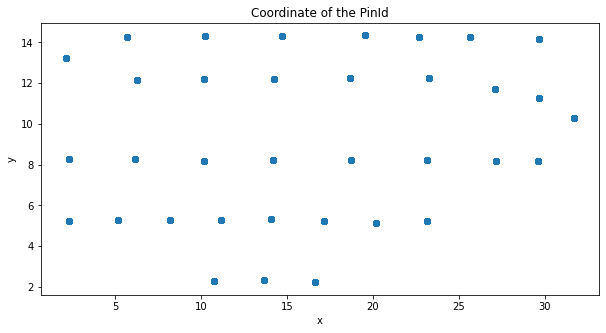

In [10]:
# plot

plt.figure(figsize=(10,5))
#fig, ax = plt.subplots()

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
# giving a title to my graph
plt.title('Coordinate of the PinId')

plt.scatter(df_train['x'], df_train['y'],  marker="o")

plt.show()

# 4. Data Preparation

In [11]:
#Data cleaning for x_train

x_train = x_train.replace(np.nan, 0, regex=True)
x_train

,CD4533FFC0E1,D2B6503554D7,D7EE034361F8,DD697EA75B68,DF231643E227,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,F8EE8B0847A4,FDAE5980F28C,EC72840D9AD3,E96AF2C858BA,E13B805C6CB0,FB2EE01C18CE
0,-83.852941,-87.000000,-66.034483,-86.791667,-89.041667,-76.217391,-96.333333,-85.909091,-69.342105,-84.575000,-79.028571,-84.735294,-83.666667,0.000000,0.0,0.000000,0.0
1,-84.800000,-87.600000,-66.136364,-85.812500,-88.411765,-76.720930,-95.000000,-88.416667,-69.117647,-84.978261,-78.354839,-81.407407,-82.714286,-77.590909,0.0,0.000000,0.0
2,-84.000000,-87.454545,-66.531250,-86.142857,-90.000000,-76.766667,-95.000000,-86.333333,-69.291667,-85.081081,-78.000000,-83.033333,-84.388889,-80.920000,0.0,0.000000,0.0
3,-87.450000,-89.428571,-65.818182,-85.769231,-89.333333,-76.388889,-96.000000,-88.384615,-69.850000,-84.520000,-77.150000,-82.312500,-82.421053,-76.090909,0.0,0.000000,0.0
4,-84.757576,-88.333333,-65.636364,-86.214286,-89.444444,-76.818182,0.000000,-87.666667,-68.551724,-86.306122,-78.388889,-85.764706,-82.619048,-79.866667,-98.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,-91.111111,-86.000000,-80.222222,-83.777778,-93.250000,-72.000000,0.000000,-93.071429,-81.423077,-70.017544,-81.785714,-87.409091,-83.000000,0.000000,0.0,-89.545455,0.0
1571,-90.000000,-85.555556,-80.666667,-83.631579,-93.500000,-72.461538,0.000000,-92.222222,-78.714286,-70.895833,-87.222222,-83.000000,-89.000000,0.000000,0.0,-91.000000,0.0
1572,-89.300000,-87.076923,-78.781250,-85.727273,-92.800000,-71.976190,0.000000,-93.052632,-80.785714,-70.962264,-85.166667,-84.200000,-84.772727,0.000000,0.0,-90.400000,0.0
1573,-90.100000,-86.750000,-82.333333,-83.850000,-93.166667,-71.895833,0.000000,-92.785714,-78.800000,-70.949153,-85.318182,-84.789474,-86.000000,0.000000,0.0,-90.000000,0.0


In [12]:
#Data cleaning for y_test to map back to the coordinate value

y_train_1 = df_train[['x','y']]
y_train_1

,x,y
0,11.17660,5.29753
1,11.17660,5.29753
2,11.17660,5.29753
3,11.17660,5.29753
4,11.17660,5.29753
...,...,...
1570,8.17867,5.28213
1571,8.17867,5.28213
1572,8.17867,5.28213
1573,8.17867,5.28213


In [13]:
#Data cleaning for x_test 

x_test = x_test.replace(np.nan, 0, regex=True)
x_test

,CD4533FFC0E1,D2B6503554D7,D7EE034361F8,DD697EA75B68,DF231643E227,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,F8EE8B0847A4,FDAE5980F28C,EC72840D9AD3,E96AF2C858BA,E13B805C6CB0,FB2EE01C18CE
0,-87.000000,-96.0,-81.250000,0.0,0.0,-80.800000,0.000000,0.0,-87.5,-69.000000,-83.000000,-83.714286,-98.0,-83.000000,0.000000,0.000000,0.000000
1,-89.500000,0.0,-81.000000,-85.0,0.0,-81.000000,0.000000,0.0,0.0,-68.000000,-84.000000,0.000000,-96.0,0.000000,0.000000,0.000000,0.000000
2,-94.000000,0.0,-98.000000,-90.0,0.0,-85.000000,0.000000,-92.5,-86.0,-67.666667,-84.500000,-90.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,-79.500000,-85.5,0.0,-77.000000,0.000000,-92.0,-86.8,-68.444444,0.000000,-84.000000,0.0,-88.000000,0.000000,0.000000,0.000000
4,-90.500000,0.0,-81.333333,-88.0,0.0,-83.333333,0.000000,-92.5,-88.0,-69.500000,-83.833333,-89.666667,0.0,-88.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-86.333333,-89.0,-89.333333,-95.0,-81.0,0.000000,-68.500000,0.0,-85.5,0.000000,0.000000,-85.400000,-97.0,-88.000000,-65.636364,-82.428571,0.000000
287,-84.333333,-89.0,-88.500000,-95.0,-76.0,0.000000,-69.125000,0.0,-86.0,0.000000,0.000000,-84.500000,0.0,-88.000000,-65.500000,-82.333333,-84.142857
288,-84.666667,-89.0,0.000000,0.0,-76.0,0.000000,-67.666667,0.0,-85.0,0.000000,0.000000,-85.500000,0.0,-88.666667,-68.000000,-84.666667,-84.250000
289,-84.000000,-90.0,0.000000,0.0,-76.5,0.000000,-68.250000,0.0,-86.0,0.000000,0.000000,-86.600000,0.0,-96.000000,-65.625000,-83.000000,-83.333333


In [14]:
#Data cleaning for y_test to map back to the coordinate value

y_test['pinId'] = y_test['PinId']
del y_test['PinId']

y_test = pd.merge(y_test, pin_info_test, on ='pinId', how ='left')
y_test

,pinId,x,y
0,R1,6.136286,5.525337
1,R1,6.136286,5.525337
2,R1,6.136286,5.525337
3,R1,6.136286,5.525337
4,R1,6.136286,5.525337
...,...,...,...
286,R5,28.965874,10.063169
287,R5,28.965874,10.063169
288,R5,28.965874,10.063169
289,R5,28.965874,10.063169


In [15]:
y_test_1 = y_test[['x','y']]
y_test_1

,x,y
0,6.136286,5.525337
1,6.136286,5.525337
2,6.136286,5.525337
3,6.136286,5.525337
4,6.136286,5.525337
...,...,...
286,28.965874,10.063169
287,28.965874,10.063169
288,28.965874,10.063169
289,28.965874,10.063169


# 5. Modeling

## 5.1 Hypothesis

In this use case, we are experimenting multiple machine learning (ML) models in which that ML model that has the lowest distance error is chosen while other ML models that has higher distance error is not selected

There are several assumptions that are applied:
1. Mean error value is based on calculation from the actual and predicted value (using Euclidian distance calculation) which dependent on the ML models chosen.
2. The mean error value are only compared with mean error value from selected ML models only (of this scope of project).
3. The mean error value from the ML model that has the least mean error value (m), will be set to build the hypothesis statement.

The research hypothesis is stated as follows:

• Null Hypothesis: The ML model is applied if the error distance  = m

          H0 : x̄ = m

• Alternate Hypothesis: The ML model is applied if the error distance  > m

          H1 : x̄ > m

## 5.2 Methodology - Analysis & Machine Learning

The models that are chosen in this experiment are as of follows:
1. Random Forest
2. K-Nearest Neighbor
3. Linear Regression

The ML models above (alongside with other models such as XGBoost, ANN, etc.) are used by the researchers of the existing literature works.

The  ML models are chosen as it has functionality to solve regression problem for a continous variable (coordinate (X,Y)) .

Below image explains the process of development of the ML model to predict the location. Using both offline and online dataset, the datasets are applied to the ML models.

The actual PinID location which are represented by (X, Y) coordinate are compared with the predicted value of the PinID location. To assess the model error, the actual and the predicted values are calculated using Euclidean distance formula: √[(x₂ - x₁)² + (y₂ - y₁)²].

The model error calculated is then is assessed using descriptive statistics: mean, median, standard deviation, and 75th and 90th percentile.

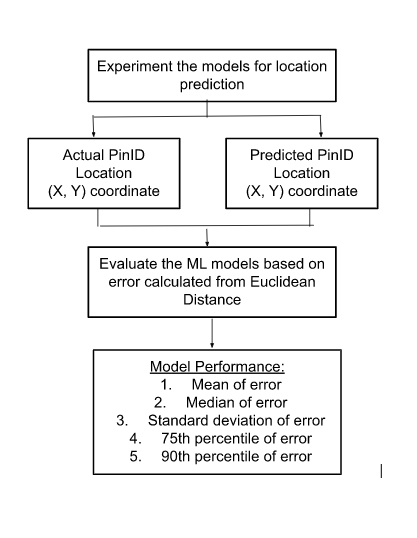

## 5.2.1 Random Forest

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(x_train, y_train_1)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [17]:
# Predict the data
y_pred = rf.predict(x_test)
y_pred

array([[ 6.8073443 , 12.1129808 ],
       [ 7.29282931, 11.71984681],
       [ 8.18154878,  7.18849395],
       [ 6.76497661,  6.80670845],
       [ 6.84103689,  6.2232052 ],
       [ 7.17928648, 12.79074109],
       [ 6.70778345,  6.09464486],
       [11.8335435 ,  5.25697701],
       [ 5.69909993,  5.96503975],
       [11.54179219,  8.96687493],
       [ 4.47848576,  6.34751458],
       [ 5.11973493,  6.62812869],
       [ 6.25156664,  5.71801705],
       [ 6.98267853, 13.38798591],
       [ 6.79947491, 12.21824429],
       [ 7.34694759, 12.98686474],
       [ 6.63505123,  6.37604446],
       [ 7.46143318, 11.58136767],
       [ 7.06805198, 12.26666069],
       [ 5.04283982,  6.12090235],
       [ 7.18013284, 12.34485043],
       [ 5.37000286,  6.54445924],
       [ 6.48974732,  6.30257731],
       [10.54675288,  9.6610812 ],
       [ 7.11953507, 12.6201935 ],
       [11.08810616,  7.90017676],
       [ 7.33928797, 12.57562174],
       [ 7.22811116,  6.22508317],
       [ 6.7471229 ,

In [18]:
# Evaluate model performance using Euclidian distance

y_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       291 non-null    float64
 1   y       291 non-null    float64
dtypes: float64(2)
memory usage: 6.8 KB


In [18]:
y_pred_1 = pd.DataFrame(y_pred, columns=['ypred_x', 'ypred_y'])
y_pred_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ypred_x  291 non-null    float64
 1   ypred_y  291 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


In [19]:
euc_d = pd.merge(y_test_1, y_pred_1, left_index = True, right_index=True)
euc_d

,x,y,ypred_x,ypred_y
0,6.136286,5.525337,6.807344,12.112981
1,6.136286,5.525337,7.292829,11.719847
2,6.136286,5.525337,8.181549,7.188494
3,6.136286,5.525337,6.764977,6.806708
4,6.136286,5.525337,6.841037,6.223205
...,...,...,...,...
286,28.965874,10.063169,29.425208,11.120078
287,28.965874,10.063169,27.824441,8.580253
288,28.965874,10.063169,27.753988,8.310463
289,28.965874,10.063169,27.674157,8.352308


In [20]:
#Eucldian function to calculate

def Euclidean_Dist(df1, df2, cols = ['x', 'y']):
   return np.linalg.norm(df1[cols].values - df2[cols].values,
      axis = 1)

In [21]:
y_pred_1.rename(columns = {'ypred_x':'x', 'ypred_y':'y'}, inplace = True)


In [22]:
df1 = euc_d[['x','y']]
df2 = y_pred_1[['x','y']]

In [23]:
ed = Euclidean_Dist(df1, df2)
df_ed = pd.DataFrame(ed, columns=['distance_error'])

In [24]:
# Merge the dataset

euc_d = pd.merge(euc_d, df_ed, left_index = True, right_index=True)  
euc_d

,x,y,ypred_x,ypred_y,distance_error
0,6.136286,5.525337,6.807344,12.112981,6.621735
1,6.136286,5.525337,7.292829,11.719847,6.301551
2,6.136286,5.525337,8.181549,7.188494,2.636132
3,6.136286,5.525337,6.764977,6.806708,1.427293
4,6.136286,5.525337,6.841037,6.223205,0.991813
...,...,...,...,...,...
286,28.965874,10.063169,29.425208,11.120078,1.152408
287,28.965874,10.063169,27.824441,8.580253,1.871339
288,28.965874,10.063169,27.753988,8.310463,2.130879
289,28.965874,10.063169,27.674157,8.352308,2.143730


In [25]:
algo_result = pd.DataFrame()
#'algo','mean', 'median', 'min','max', '90th_pc'])


In [26]:
algo_result = algo_result.append({'Algo': 'Random Forest','Mean' : euc_d['distance_error'].mean(),
                                  'Median' : euc_d['distance_error'].median(),
                                  'Standard Deviation' : euc_d['distance_error'].std(),
                                  '75th pc' : np.percentile(euc_d['distance_error'], 75),
                                 '90th pc' : np.percentile(euc_d['distance_error'], 90)},                    
                                 ignore_index = True)


In [27]:
algo_result

,75th pc,90th pc,Algo,Mean,Median,Standard Deviation
0,3.540911,6.506491,Random Forest,2.870193,2.275538,2.14008


## 5.2.2 K-nearest neighbors

In [28]:
# Import libraries

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

# Train the algorithm

knn = neighbors.KNeighborsRegressor(n_neighbors = 1)
knn.fit(x_train, y_train_1)

KNeighborsRegressor(n_neighbors=1)

In [29]:
#Predict the model
y_pred_knn =knn.predict(x_test) 
y_pred_knn

array([[ 6.25565 , 12.1664  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.29375 ,  5.25191 ],
       [10.7479  ,  2.29302 ],
       [ 6.1646  ,  8.27409 ],
       [ 6.25565 , 12.1664  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 6.1646  ,  8.27409 ],
       [ 6.25565 , 12.1664  ],
       [ 5.18069 ,  5.26673 ],
       [ 2.1416  , 13.2573  ],
       [10.7479  ,  2.29302 ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [13.6349  ,  2.30785 ],
       [ 2.1416  , 13.2573  ],
       [ 5.18069 ,  5.26673 ],
       [ 5.68962 , 14.2763  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [ 2.1416  , 13.2573  ],
       [

In [30]:
# Calculating the Euclidean distance

y_pred_3 = pd.DataFrame(y_pred_knn, columns=['x', 'y'])

df1_knn = y_test_1[['x','y']]
df2_knn = y_pred_3[['x','y']]

ed_knn = Euclidean_Dist(df1_knn, df2_knn)
df_ed_knn = pd.DataFrame(ed_knn, columns=['distance_error'])

euc_d_knn = pd.merge(y_test_1, y_pred_3, left_index = True, right_index=True)  
euc_d_knn = pd.merge(euc_d_knn, df_ed_knn, left_index = True, right_index=True)  
euc_d_knn.rename(columns = {'x_x':'x', 'y_x':'y', 'x_y':'ypred_x', 'y_y':'ypred_y'}, inplace = True)

euc_d_knn

,x,y,ypred_x,ypred_y,distance_error
0,6.136286,5.525337,6.255650,12.16640,6.642136
1,6.136286,5.525337,2.141600,13.25730,8.702917
2,6.136286,5.525337,2.141600,13.25730,8.702917
3,6.136286,5.525337,2.141600,13.25730,8.702917
4,6.136286,5.525337,2.141600,13.25730,8.702917
...,...,...,...,...,...
286,28.965874,10.063169,29.594400,8.17202,1.992860
287,28.965874,10.063169,29.689400,11.28600,1.420847
288,28.965874,10.063169,27.133301,11.71770,2.468967
289,28.965874,10.063169,27.133301,11.71770,2.468967


In [31]:
algo_result = algo_result.append({'Algo': 'KNN','Mean' : euc_d_knn['distance_error'].mean(),
                                  'Median' : euc_d_knn['distance_error'].median(),
                                  'Standard Deviation' : euc_d_knn['distance_error'].std(),
                                  '75th pc' : np.percentile(euc_d_knn['distance_error'], 75),
                                 '90th pc' : np.percentile(euc_d_knn['distance_error'], 90)},                    
                                 ignore_index = True)


In [32]:
algo_result

,75th pc,90th pc,Algo,Mean,Median,Standard Deviation
0,3.540911,6.506491,Random Forest,2.870193,2.275538,2.140080
1,7.385053,8.702917,KNN,5.045033,4.174434,3.209401


## 5.2.3 Linear Regression

In [33]:
#Import libaries
from sklearn.linear_model import LinearRegression

#Training the algorithm
lr = LinearRegression()  
lr.fit(x_train, y_train_1) 

LinearRegression()

In [34]:
# Predict the test data test data
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([[11.31797962,  9.66756304],
       [ 7.26440231,  7.01845503],
       [ 3.99124794, 12.60002221],
       [ 7.20455143, 16.9942785 ],
       [ 4.41644078, 14.33740437],
       [ 8.50116483, 11.5465095 ],
       [ 2.83775751, 13.86969628],
       [ 9.78369722,  9.88541376],
       [ 4.88244833, 10.45477554],
       [ 7.37022904, 12.97150643],
       [ 5.58479788, 11.30333976],
       [ 3.97086301, 12.38881158],
       [ 5.46363497, 12.13508855],
       [13.15684866, 10.93605598],
       [ 9.08760505, 10.43444457],
       [10.14813857, 12.34713103],
       [ 2.20338094, 11.56504478],
       [15.32020609, 11.9899504 ],
       [12.93796908, 10.35501188],
       [ 4.51883148, 14.07784782],
       [10.07755667, 12.07439421],
       [ 3.99190079, 12.41043801],
       [ 4.2386881 , 12.24057871],
       [13.17875215, 10.30897265],
       [10.82166993, 12.45824607],
       [16.02780181,  8.77507275],
       [ 8.46917469, 11.38274395],
       [ 2.90084042, 13.09791904],
       [12.60070213,

In [35]:
y_pred_2 = pd.DataFrame(y_pred_lr, columns=['x', 'y'])
y_pred_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       291 non-null    float64
 1   y       291 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


In [36]:
df1_lr = y_test_1[['x','y']]
df2_lr = y_pred_2[['x','y']]

ed_lr = Euclidean_Dist(df1_lr, df2_lr)
df_ed_lr = pd.DataFrame(ed_lr, columns=['distance_error'])

In [37]:
euc_d_lr = pd.merge(y_test_1, y_pred_2, left_index = True, right_index=True)  
euc_d_lr

,x_x,y_x,x_y,y_y
0,6.136286,5.525337,11.317980,9.667563
1,6.136286,5.525337,7.264402,7.018455
2,6.136286,5.525337,3.991248,12.600022
3,6.136286,5.525337,7.204551,16.994278
4,6.136286,5.525337,4.416441,14.337404
...,...,...,...,...
286,28.965874,10.063169,25.771148,11.839246
287,28.965874,10.063169,29.324838,13.441182
288,28.965874,10.063169,30.160070,12.154825
289,28.965874,10.063169,30.095519,12.344429


In [38]:
euc_d_lr = pd.merge(euc_d_lr, df_ed_lr, left_index = True, right_index=True)  
euc_d_lr.rename(columns = {'x_x':'x', 'y_x':'y', 'x_y':'ypred_x', 'y_y':'ypred_y'}, inplace = True)

euc_d_lr

,x,y,ypred_x,ypred_y,distance_error
0,6.136286,5.525337,11.317980,9.667563,6.633851
1,6.136286,5.525337,7.264402,7.018455,1.871376
2,6.136286,5.525337,3.991248,12.600022,7.392723
3,6.136286,5.525337,7.204551,16.994278,11.518585
4,6.136286,5.525337,4.416441,14.337404,8.978329
...,...,...,...,...,...
286,28.965874,10.063169,25.771148,11.839246,3.655232
287,28.965874,10.063169,29.324838,13.441182,3.397032
288,28.965874,10.063169,30.160070,12.154825,2.408553
289,28.965874,10.063169,30.095519,12.344429,2.545633


In [39]:
algo_result = algo_result.append({'Algo': 'Linear Regression','Mean' : euc_d_lr['distance_error'].mean(),
                                  'Median' : euc_d_lr['distance_error'].median(),
                                   'Standard Deviation' : euc_d_lr['distance_error'].std(),
                                  '75th pc' : np.percentile(euc_d_lr['distance_error'], 75),
                                 '90th pc' : np.percentile(euc_d_lr['distance_error'], 90)},                    
                                 ignore_index = True)


In [40]:
algo_result

,75th pc,90th pc,Algo,Mean,Median,Standard Deviation
0,3.540911,6.506491,Random Forest,2.870193,2.275538,2.140080
1,7.385053,8.702917,KNN,5.045033,4.174434,3.209401
2,7.024705,8.661839,Linear Regression,5.169390,5.144475,2.473010


# 6. X Test Submission Test Set

In [45]:
#x_test_sub = x_test_sub.replace(np.nan, 0, regex=True)

#Predict
y_sub = rf.predict(x_test_sub)
y_sub

array([[ 6.32210879, 11.98217747],
       [ 4.10285829,  8.26750279],
       [ 6.35643437, 12.60640199],
       [ 8.20304094, 12.45142621],
       [ 6.43123081, 12.37715494],
       [ 6.54531527, 12.41109442],
       [ 3.83345079,  7.32117178],
       [ 6.55649703, 12.26615698],
       [ 3.55926709,  6.26751513],
       [ 3.93985042,  7.40311493],
       [ 8.75510155,  6.13919071],
       [ 6.54200711, 12.49314373],
       [ 3.82923376,  7.40732753],
       [ 6.3202343 , 12.34722622],
       [ 6.42575857, 12.55615909],
       [ 6.24616928, 12.0665182 ],
       [ 5.50258934,  8.16505005],
       [ 6.28778066, 12.26667555],
       [ 6.79415264, 13.62220952],
       [ 8.81025613, 11.12050322],
       [ 6.6490448 , 12.40740195],
       [ 6.29420765, 13.67469582],
       [ 6.59665769, 12.53256723],
       [ 6.86426941, 12.35812848],
       [ 5.36584634, 10.09983013],
       [ 6.23654713, 13.61591022],
       [ 6.43197527, 12.08081556],
       [ 6.37867936, 12.03684778],
       [ 6.08364164,

In [46]:
y_pred_4 = pd.DataFrame(y_sub, columns=['X', 'Y'])
y_pred_4.to_csv('y_submission.csv')

# 7. Result and Conclusion

In [47]:
algo_result_1 = algo_result[['Algo', 'Mean', 'Median', 'Standard Deviation', '75th pc', '90th pc']]

In [48]:
algo_result_1

,Algo,Mean,Median,Standard Deviation,75th pc,90th pc
0,Random Forest,2.870193,2.275538,2.140080,3.540911,6.506491
1,KNN,5.045033,4.174434,3.209401,7.385053,8.702917
2,Linear Regression,5.169390,5.144475,2.473010,7.024705,8.661839


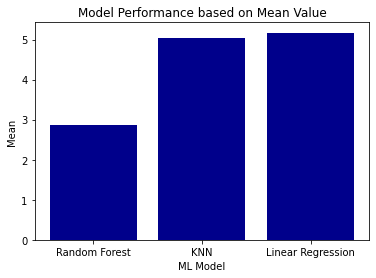

In [56]:
#Display the perfomance of the ML models based on Mean value

# Create a bar plot with dark blue color
plt.bar(algo_result_1["Algo"], algo_result_1["Mean"], color='darkblue')

# Set the title and axis labels
plt.title('Model Performance based on Mean Value')
plt.xlabel('ML Model')
plt.ylabel('Mean')

# Display the plot
plt.show()

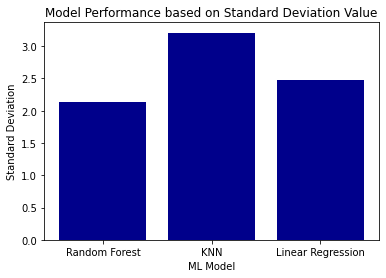

In [58]:
#Display the perfomance of the ML models based on Standard Deviation value

# Create a bar plot
plt.bar(algo_result_1["Algo"], algo_result_1["Standard Deviation"], color='darkblue')

# Set the title and axis labels
plt.title('Model Performance based on Standard Deviation Value')
plt.xlabel('ML Model')
plt.ylabel('Standard Deviation')

# Display the plot
plt.show()


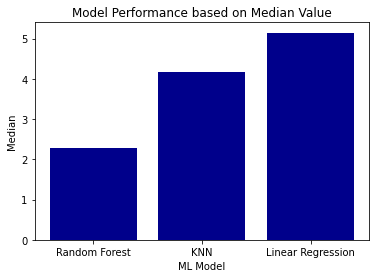

In [59]:
#Display the perfomance of the ML models based on Median value

# Create a bar plot
plt.bar(algo_result_1["Algo"], algo_result_1["Median"], color='darkblue')

# Set the title and axis labels
plt.title('Model Performance based on Median Value')
plt.xlabel('ML Model')
plt.ylabel('Median')

# Display the plot
plt.show()


Conclusion:
1. Out of the 3 ML models, Random Forest (RF) model has shown consistent performance which lowest value across all the error metrics hence transleted to higher accuracy.
2. The mean error distance value for RF is 2.870193, while median is 2.275538, and standard deviation is 2.140080.
3. The standard deviation describes the dispersion of the data within the mean. In this case, the lower the standard deviation value, the better the model in which the predicted location is closer to the ground truth location.
4. RF is chosen to run the X test submission test and hence it is recommended to use this model when approaching this use case.

# 8. Reference

[1] Y. Lin, Y. Fang, and W. Su, “A Hybrid Indoor Positioning System Design based on BLE,” vol. 2, no. 10, pp. 31–38, 2018.

[2] P. Varshney, H. Saini, and V. L. Erickson, “Real-time Asset Management and Localization with Machine Learning and Bluetooth Low Energy Tags,” Proc. - 2020 Int. Conf. Comput. Sci. Comput. Intell. CSCI 2020, pp. 1120–1125, 2020, doi: 10.1109/CSCI51800.2020.00208.

[3] R. R. Tirumalareddy, “BLE Beacon Based Indoor Positioning System in an Office Building using Machine Learning,” no. June, 2020.

[4] I. Alexander and G. P. Kusuma, “Predicting indoor position using bluetooth low energy and machine learning,” Int. J. Sci. Technol. Res., vol. 8, no. 9, pp. 1661–1667, 2019.

[5] H. Zadgaonkar and M. Chandak, “Locating Objects in Warehouses Using BLE Beacons Machine Learning,” IEEE Access, vol. 9, pp. 153116–153125, 2021, doi: 10.1109/ACCESS.2021.3127908.

[6] Saithwar, A. (2022, March 28). Understanding ble beacons and their applications. Semiwiki. Retrieved October 3, 2022, from https://semiwiki.com/semiconductor-services/einfochips/302892-understanding-ble-beacons-and-their-applications/ 

[7] People locating system - beacontrax - innovative Bluetooth Solutions. BeaconTrax. (2021, February 23). Retrieved October 4, 2022, from https://www.beacontrax.com/people-locating-system/ 

# 9. Future Works

1. Explore several parameter tuning of each of the ML model
2. Experiment more on features: normalized the data/features reduction using PCA
3. Experiment with different approach when dealing of missing values in data